In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('max_colwidth',1000)

In [126]:
# Load the loan data
df_raw = pd.read_pickle('loan_data.pkl')

In [127]:
# Load the dictionary from Lending Club data
loan_dict = pd.read_excel(open('LCDataDictionary.xlsx','rb'), sheet_name='LoanStats')

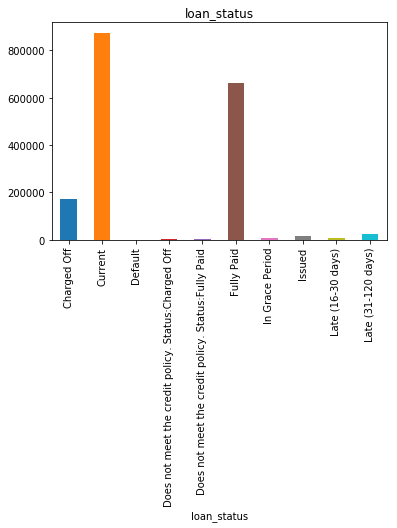

In [128]:
# Let's plot the status first.
df_raw.groupby('loan_status').size().plot(kind='bar', title='loan_status')

In [129]:
# For our analysis purpose, we can take only the "Fully Paid", "Charged Off" and "Default"
df = df_raw.loc[df_raw['loan_status'].isin(['Fully Paid', 'Charged Off', 'Default'])]

# Henceforth, we will work only with df

In [130]:
# df.loc[df['loan_status'] == 'Fully Paid']

In [131]:
# Looking at all the columns, the following columns are not valid as they calculated after the loan is approved
remove_from_df = ['pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                  'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
                  'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'delinq_amnt', 
                  'hardship_flag', 'hardship_reason', 'hardship_status', 'deferral_term',
                  'hardship_amount', 'hardship_start_date', 'hardship_end_date',
                  'payment_plan_start_date', 'hardship_length', 'hardship_dpd',
                  'hardship_loan_status', 'orig_projected_additional_accrued_interest',
                  'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
                  'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status',
                  'settlement_date', 'settlement_amount', 'settlement_percentage',
                  'settlement_term', 'last_pymnt_amnt', 'last_pymnt_d', 'sec_app_earliest_cr_line']

# Here is the meaning of all these fields
loan_dict.loc[loan_dict['LoanStatNew'].isin(remove_from_df)]

,LoanStatNew,Description
11,collection_recovery_fee,post charge off collection fee
14,delinq_amnt,The past-due amount owed for the accounts on which the borrower is now delinquent.
39,last_pymnt_amnt,Last total payment amount received
40,last_pymnt_d,Last month payment was received
80,out_prncp,Remaining outstanding principal for total amount funded
81,out_prncp_inv,Remaining outstanding principal for portion of total amount funded by investors
88,pymnt_plan,Indicates if a payment plan has been put in place for the loan
89,recoveries,post charge off gross recovery
105,total_pymnt,Payments received to date for total amount funded
106,total_pymnt_inv,Payments received to date for portion of total amount funded by investors


In [132]:
# Dropping all those columns
df.drop(remove_from_df, axis=1, inplace=True)

/home/anilraj/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [133]:
# Last time when I printed there were two categories from bad loan. "Default" and "Charged Off"
# Merge both of them
df.loc[df['loan_status'] == 'Default', 'loan_status'] = 'Charged Off'

/home/anilraj/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [134]:
print(df.shape)

(833461, 98)


In [135]:
# So, here we are.
# We have 99 features and 833461 amount of data.

# Next, let's convert all the categorical data type to numerics (one-hots)

In [136]:
# Before jumping in, we need to look at all the date kind of entries.
# Example below
df['issue_d'].unique()

array(['Sep-16', 'Aug-16', 'Jul-16', 'Jun-17', 'May-17', 'Apr-17',
       'Dec-13', 'Nov-13', 'Oct-13', 'Sep-13', 'Aug-13', 'Jul-13',
       'Jun-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13', 'Jan-13',
       'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12', 'Jul-12',
       'Jun-12', 'May-12', 'Apr-12', 'Mar-12', 'Feb-12', 'Jan-12',
       'Dec-15', 'Nov-15', 'Oct-15', 'Sep-15', 'Aug-15', 'Jul-15',
       'Jun-15', 'May-15', 'Apr-15', 'Mar-15', 'Feb-15', 'Jan-15',
       'Mar-17', 'Feb-17', 'Jan-17', 'Dec-14', 'Nov-14', 'Oct-14',
       'Sep-14', 'Aug-14', 'Jul-14', 'Jun-14', 'May-14', 'Apr-14',
       'Mar-14', 'Feb-14', 'Jan-14', 'Dec-16', 'Nov-16', 'Oct-16',
       'Dec-17', 'Nov-17', 'Oct-17', 'Sep-17', 'Aug-17', 'Jul-17',
       'Mar-16', 'Feb-16', 'Jan-16', 'Dec-11', 'Nov-11', 'Oct-11',
       'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11', 'May-11', 'Apr-11',
       'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10',
       'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10', 'May-10', 'Apr-

In [137]:
print(df['earliest_cr_line'].unique())

['Aug-1986' 'Feb-1998' 'Sep-2004' ... 'Oct-68' 'Oct-74' 'Jun-1952']


In [138]:
# The 'earliest_cr_line' data needs some fix
# Added 19xx and 20xx (instead of removing them.)
# That is because, we have both the century dates.

# One trick is to split and month and year.
# Then if year is greater than 50 and less than 1000, then add 19xx
# If year is less than 50 and less than 1000, then add 20xx

# Below, I split all the columns which has dates.
# After that, I will add 19 / 20.

In [139]:
df['last_credit_pull_d'].unique()

array(['Jul-17', 'Aug-17', 'Nov-17', 'Jan-18', 'Apr-17', 'Dec-17',
       'Oct-17', 'Jun-17', 'Sep-17', 'May-17', 'Mar-17', 'Oct-16',
       'Feb-17', 'Sep-16', 'Jan-17', 'Nov-16', 'Dec-16', 'Aug-16',
       'Jul-16', 'Jun-16', nan, 'Aug-14', 'Aug-15', 'May-15', 'Mar-16',
       'Mar-14', 'May-16', 'Oct-15', 'Dec-15', 'Feb-16', 'Mar-15',
       'Apr-15', 'Sep-14', 'May-14', 'Dec-14', 'Jan-14', 'Jan-15',
       'Feb-14', 'Sep-15', 'Jul-14', 'Jun-15', 'Apr-16', 'Nov-15',
       'Nov-14', 'Jan-16', 'Oct-14', 'Jun-14', 'Feb-15', 'Jul-15',
       'Apr-14', 'Nov-13', 'Dec-13', 'Oct-13', 'Sep-13', 'Aug-13',
       'Jun-13', 'Jul-13', 'May-13', 'Apr-13', 'Mar-13', 'Feb-13',
       'Jan-13', 'Dec-12', 'Nov-12', 'Oct-12', 'Sep-12', 'Aug-12',
       'Jun-12', 'Jul-12', 'May-12', 'Apr-12', 'Feb-12', 'Mar-12',
       'Jan-12', '0', 'Nov-11', 'Dec-11', 'Oct-11', 'Sep-11', 'Aug-11',
       'Jul-11', 'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11',
       'Jan-11', 'Dec-10', 'Nov-10', 'Oct-10', 'Sep-

In [140]:
len(df.loc[df['last_credit_pull_d'] == '0'])

3

In [141]:
# There are only 3 entries with 0, let's remove those.
df.drop(df[df.last_credit_pull_d == '0'].index, inplace=True)
len(df.loc[df['last_credit_pull_d'] == '0'])

/home/anilraj/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


0

In [142]:
# Simply remove all the entris with NaN (Should have done in the beginning)
# for row in np.where(pd.isnull(df))[0][::-1]: # [::-1] reverses the array. Deleting from the. Otherwise the row numbers change.
    # print(row)
    # df.drop(row)
    
print(len(df))
# np.where(pd.isnull(df))
df.drop(df.index[np.where(pd.isnull(df))[0]], inplace=True)
print(len(df))

833446
831883


/home/anilraj/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [143]:
# These entries can be made two separate entries - issue_d_year, issue_d_month
# Borrowing ideas from here: https://stackoverflow.com/questions/14745022/how-to-split-a-column-into-two-columns

# For all the date kind of entries, change it to numerics.
# And delete the original entry

# import calendar
# df = df.join(df['issue_d'].str.split('-', 1, expand=True))
# df['mon'] = df['mon'].apply(lambda x: calendar.month_name[x])

month_lookup = {'Jan': '01', 
                'Feb': '02', 
                'Mar': '03',
                'Apr': '04', 
                'May': '05', 
                'Jun': '06', 
                'Jul': '07', 
                'Aug': '08', 
                'Sep': '09', 
                'Oct': '10', 
                'Nov': '11', 
                'Dec': '12'}

for item in ['issue_d', 'earliest_cr_line', 'last_credit_pull_d']:
    df[item + '_mon'], df[item + '_yr'] = df[item].str.split('-', 1).str
    df[item + '_mon'] = df[item + '_mon'].apply(lambda x: month_lookup[x])
    # try:
        # df[item + '_mon'] = df[item + '_mon'].apply(lambda x: month_lookup[x])
    # except:
        # # Throw away anytime the conversion doesn't work. We have enough data.
        # df.drop(item + '_mon', axis=1, inplace=True)
    df.drop(item, axis=1, inplace=True)

/home/anilraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/anilraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/anilraj/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=

In [159]:
# print(df['earliest_cr_line_yr'])
df['earliest_cr_line_yr'] = df['earliest_cr_line_yr'].astype(int)
# Then if year is greater than 20 and less than 1000, then add 19xx
# If year is less than 20 and less than 1000, then add 20xx

print(df['earliest_cr_line_yr'].unique())

mask = (df['earliest_cr_line_yr'] >= 20) & (df['earliest_cr_line_yr'] < 1000)
df.loc[mask, 'earliest_cr_line_yr'] += 1900
print(df['earliest_cr_line_yr'].unique())

mask = (df['earliest_cr_line_yr'] < 20)
df.loc[mask, 'earliest_cr_line_yr'] += 2000
print(df['earliest_cr_line_yr'].unique())


[1986 1998 2004 1999 2005 1987 2003 1992 2009 1996 2012 1993 2007 1995
 1997 2011 1994 2002 2000 2008 2001 2010 2006 1980 1984 1991 1990 1985
 1989 1988 2013 1978 1983 1976 1967 1979 1971 1982 1973 1981 1977 1963
 1972 1965 1966 1968 1970 1969 1964 1974 1975 1956 1959 1961 1960 1962
 2014 1958 1957 1953 1955 1950 1951 1952 1954 1949 1944 1948    1    4
    5    7    3    2    6    0    8 1946]
[1986 1998 2004 1999 2005 1987 2003 1992 2009 1996 2012 1993 2007 1995
 1997 2011 1994 2002 2000 2008 2001 2010 2006 1980 1984 1991 1990 1985
 1989 1988 2013 1978 1983 1976 1967 1979 1971 1982 1973 1981 1977 1963
 1972 1965 1966 1968 1970 1969 1964 1974 1975 1956 1959 1961 1960 1962
 2014 1958 1957 1953 1955 1950 1951 1952 1954 1949 1944 1948    1    4
    5    7    3    2    6    0    8 1946]
[1986 1998 2004 1999 2005 1987 2003 1992 2009 1996 2012 1993 2007 1995
 1997 2011 1994 2002 2000 2008 2001 2010 2006 1980 1984 1991 1990 1985
 1989 1988 2013 1978 1983 1976 1967 1979 1971 1982 1973 1981 197

/home/anilraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/anilraj/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [162]:
# Now take care of zip codes also
print(df['zip_code'].unique())

# A simple replacement should do the trick
df['zip_code'] = df['zip_code'].str.replace("xx","")
print(df['zip_code'].unique())

['462' '292' '735' '604' '731' '112' '775' '985' '333' '770' '760' '970'
 '923' '980' '481' '338' '191' '802' '461' '895' '852' '190' '451' '791'
 '196' '488' '208' '908' '921' '785' '467' '853' '982' '891' '773' '914'
 '920' '334' '104' '240' '902' '941' '482' '064' '371' '598' '880' '232'
 '060' '890' '948' '558' '547' '657' '940' '954' '601' '665' '335' '300'
 '801' '366' '787' '295' '100' '926' '150' '751' '606' '027' '750' '806'
 '612' '925' '282' '730' '170' '993' '183' '805' '337' '115' '235' '600'
 '119' '765' '113' '981' '444' '454' '220' '020' '221' '330' '422' '959'
 '070' '109' '321' '793' '080' '900' '933' '493' '207' '071' '675' '539'
 '103' '400' '813' '275' '974' '331' '641' '068' '430' '650' '786' '141'
 '370' '293' '807' '323' '722' '570' '280' '130' '303' '217' '018' '633'
 '347' '851' '894' '229' '945' '922' '913' '917' '117' '483' '302' '284'
 '111' '301' '496' '381' '065' '054' '841' '840' '077' '290' '740' '441'
 '201' '625' '857' '224' '145' '911' '067' '553' '9

/home/anilraj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


/home/anilraj/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


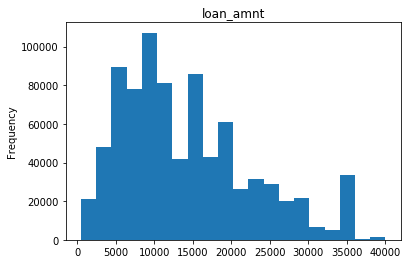

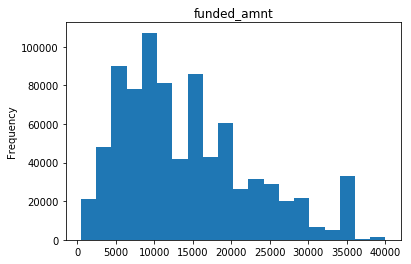

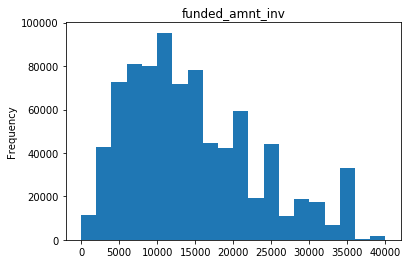

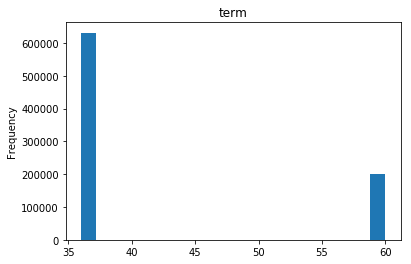

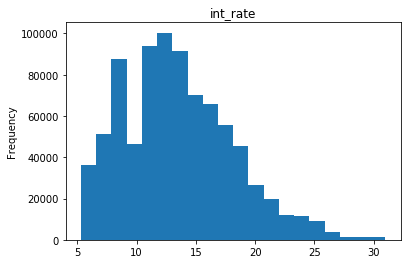

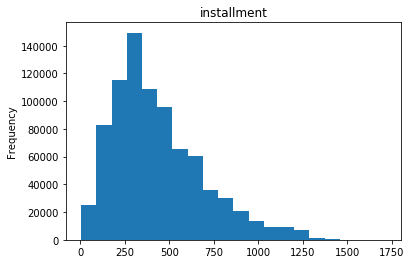

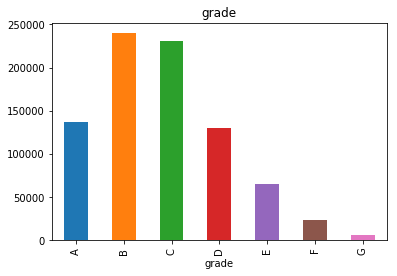

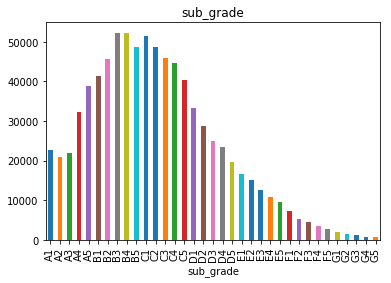

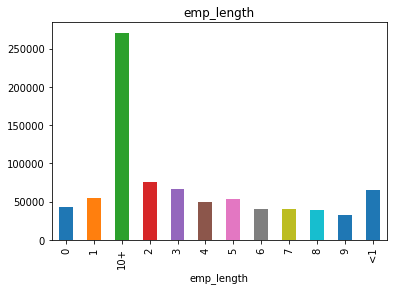

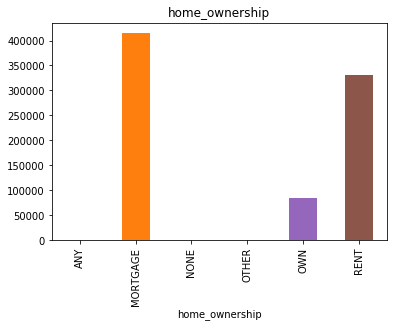

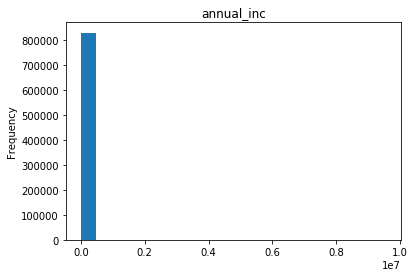

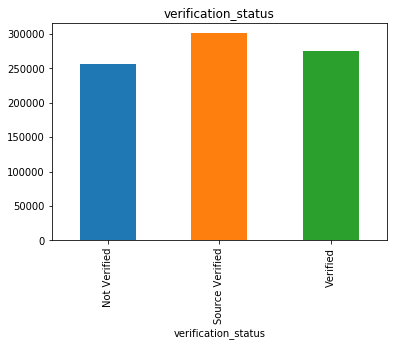

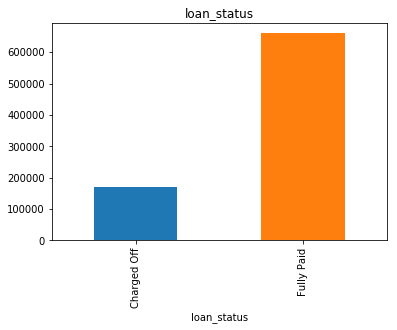

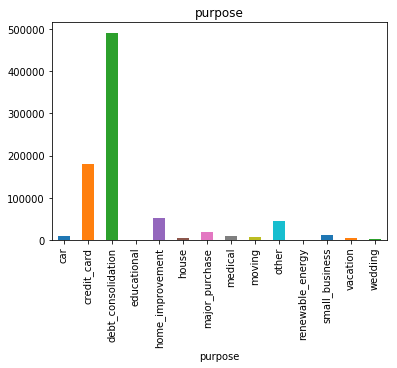

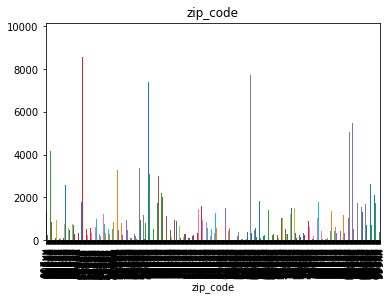

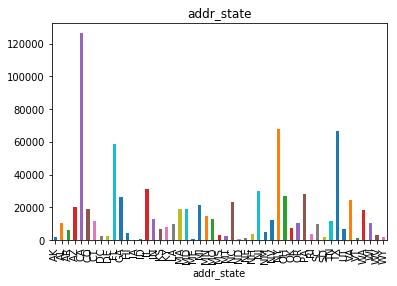

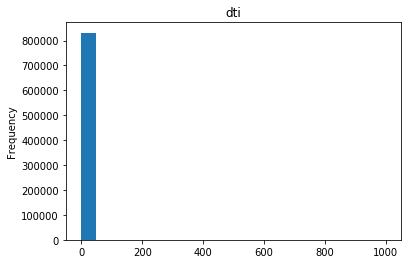

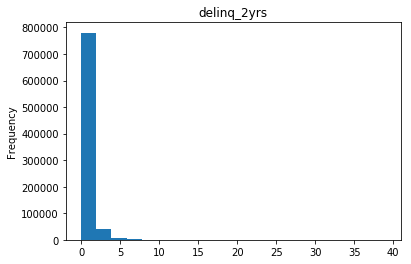

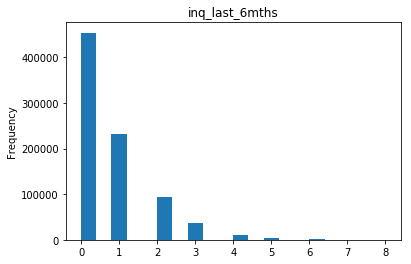

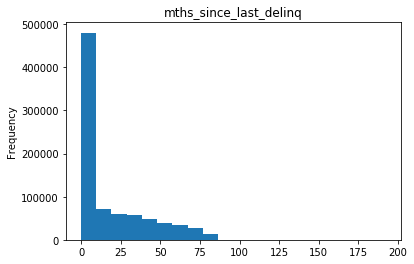

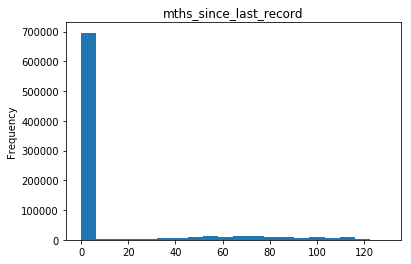

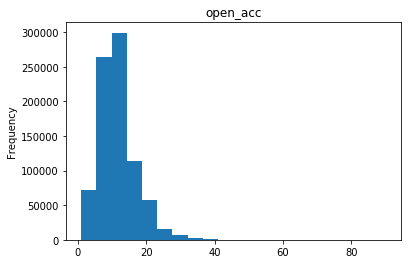

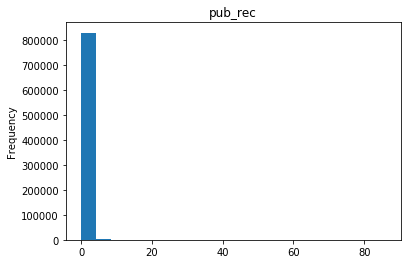

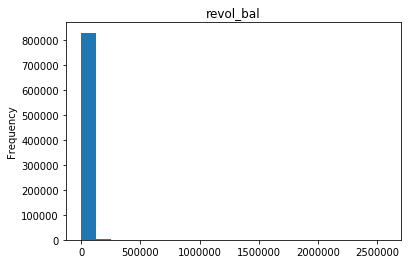

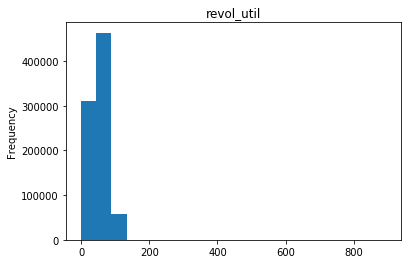

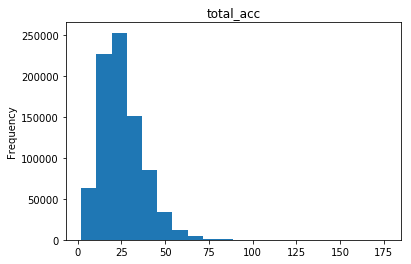

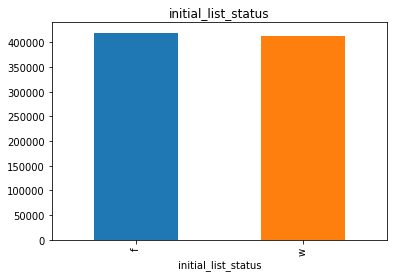

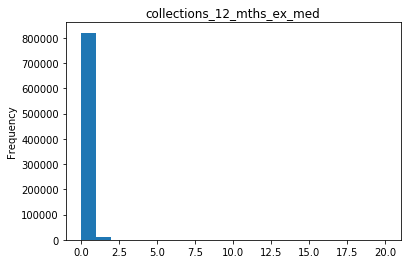

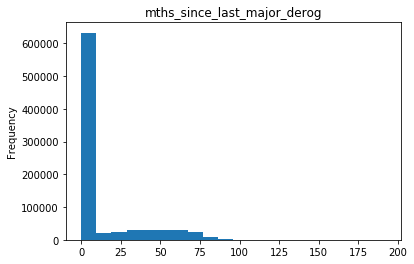

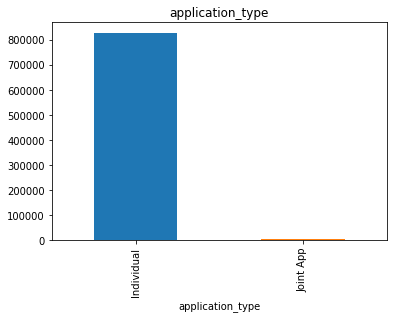

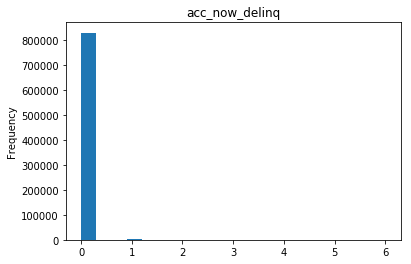

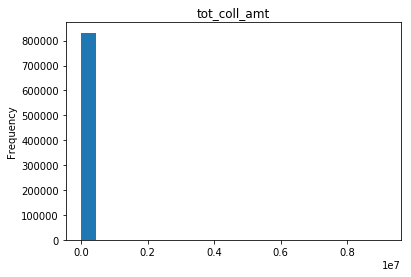

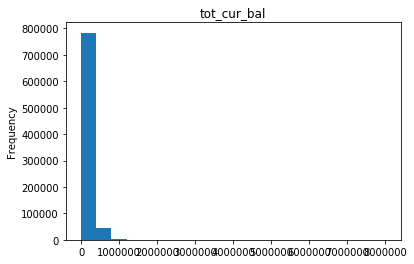

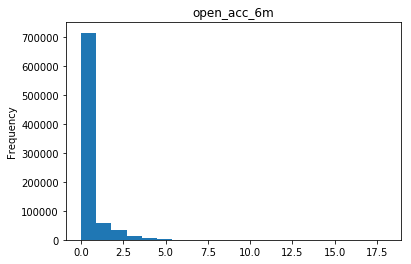

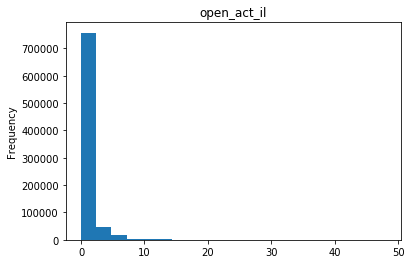

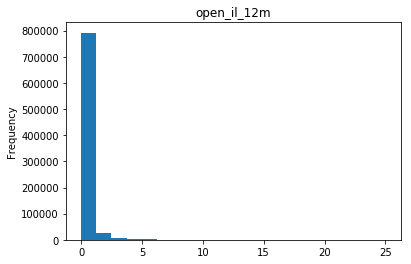

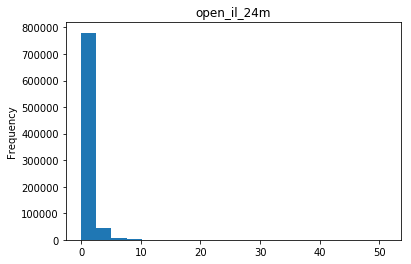

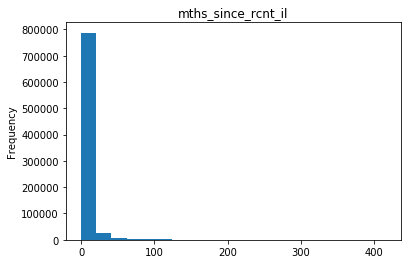

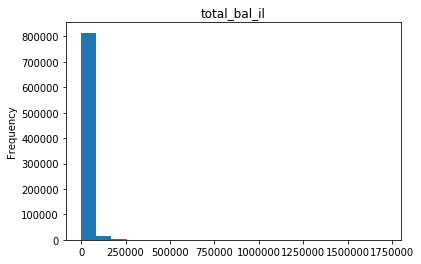

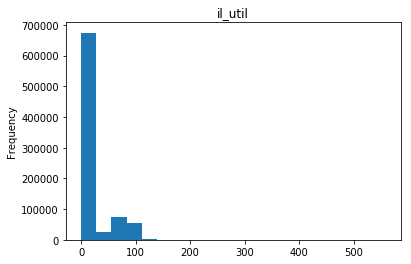

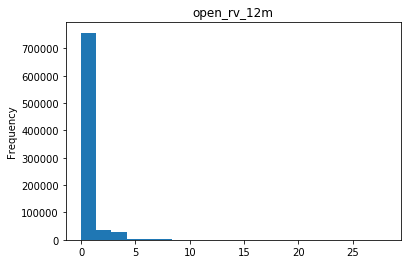

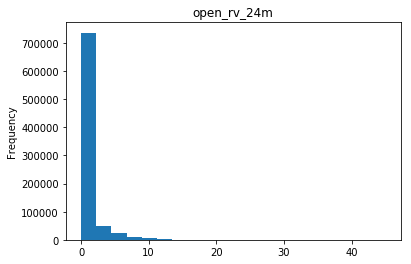

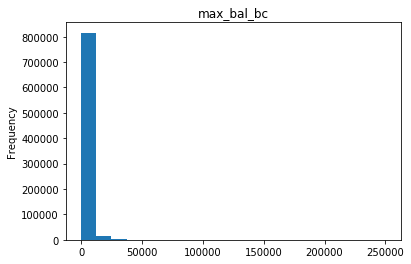

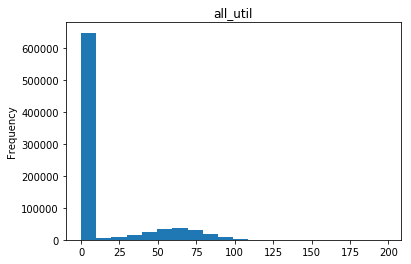

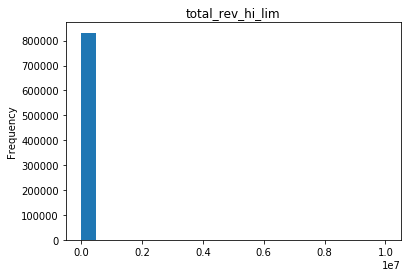

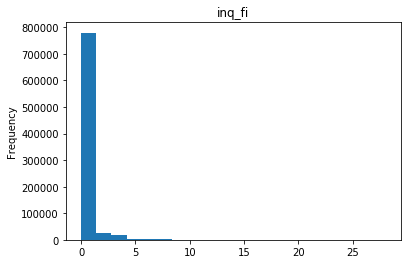

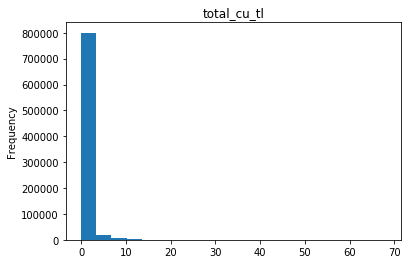

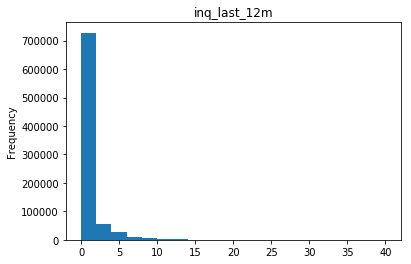

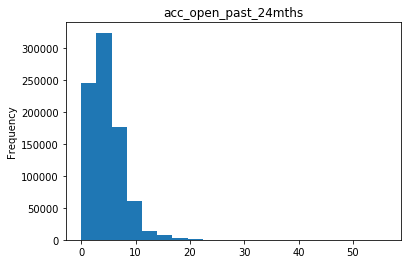

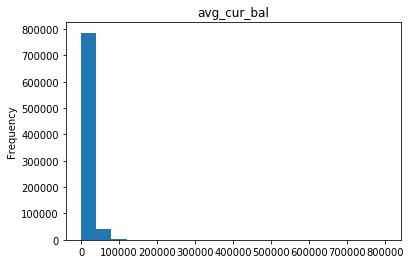

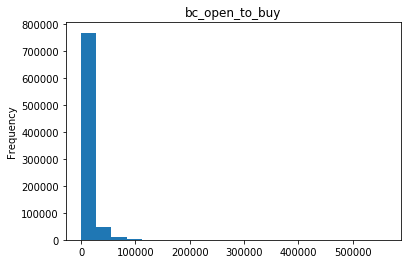

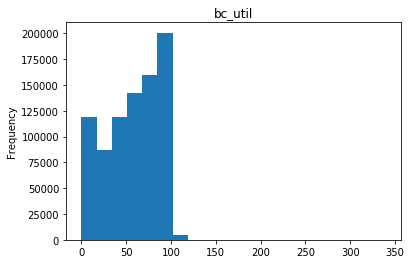

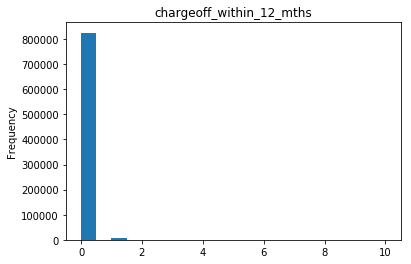

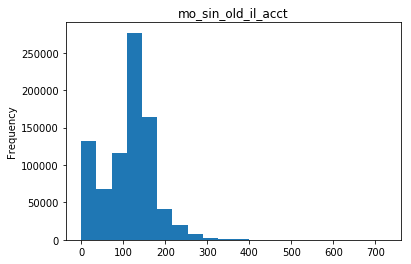

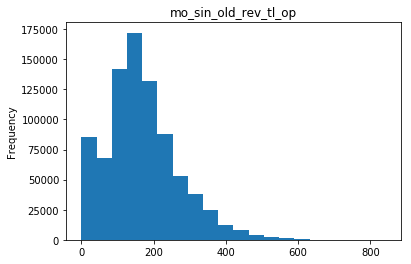

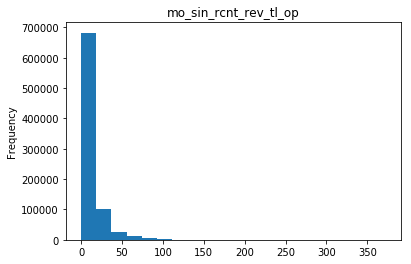

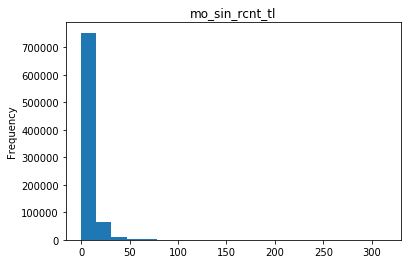

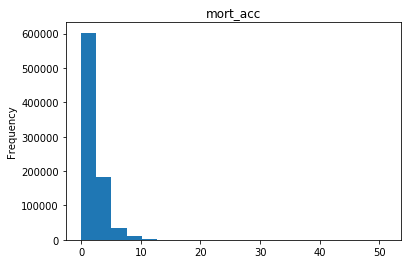

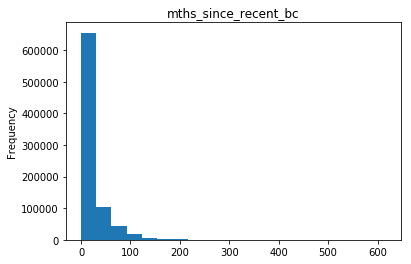

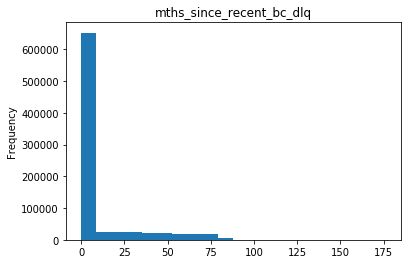

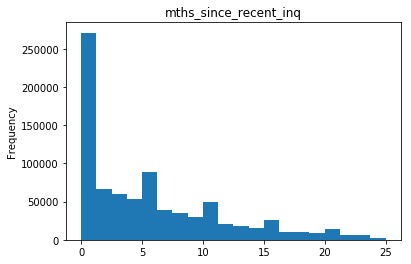

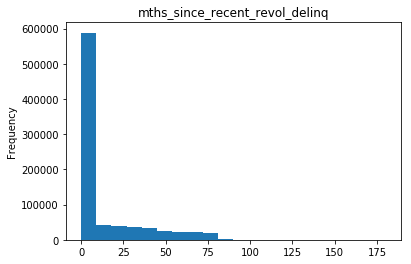

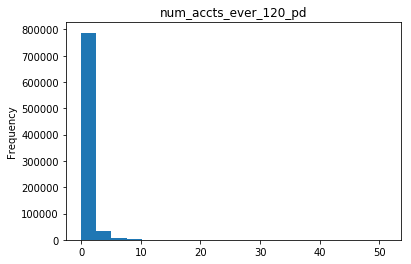

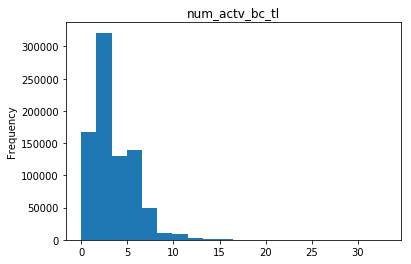

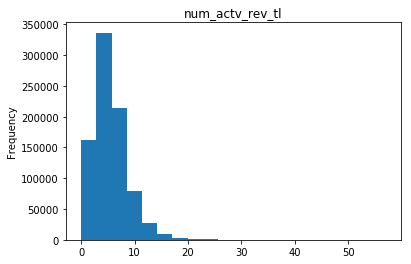

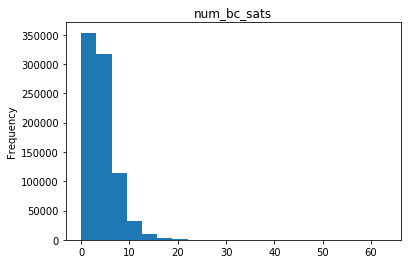

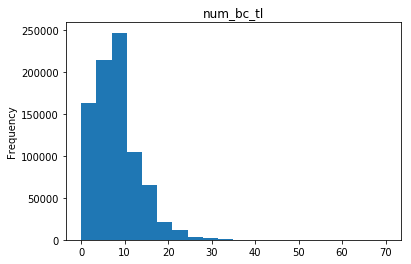

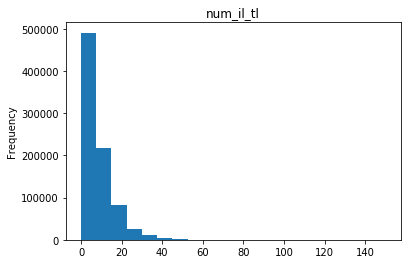

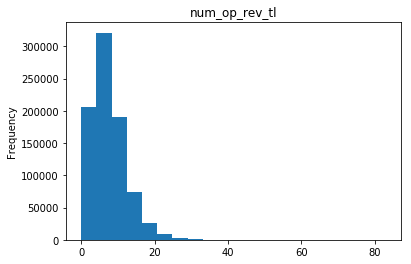

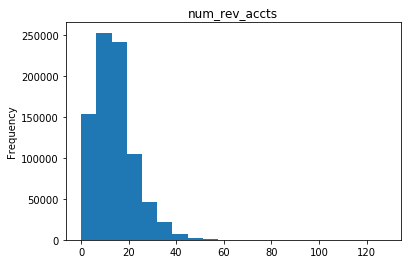

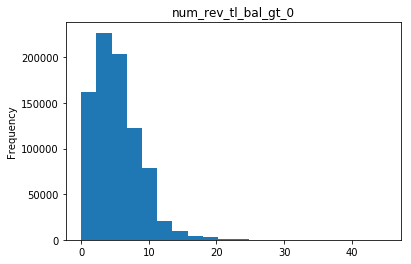

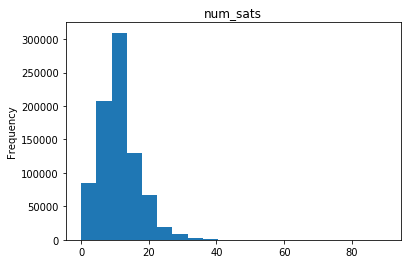

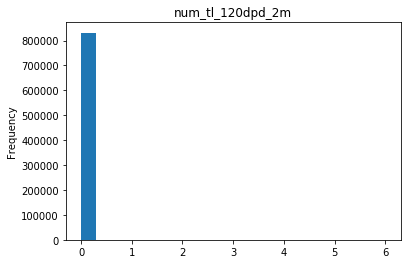

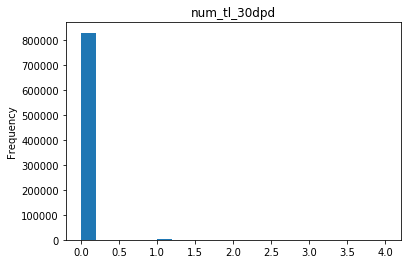

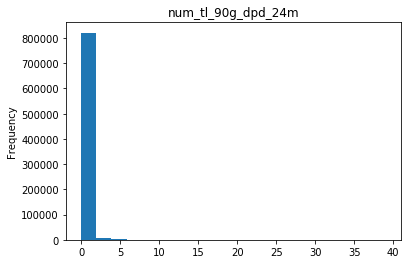

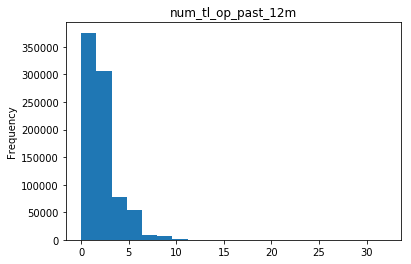

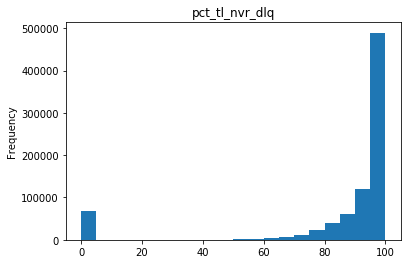

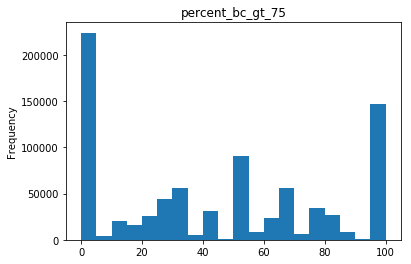

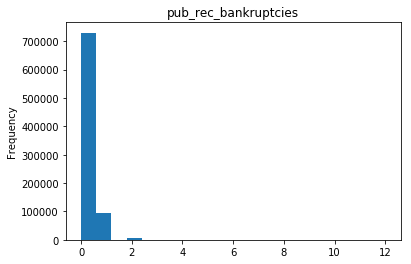

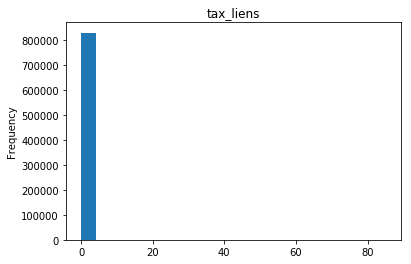

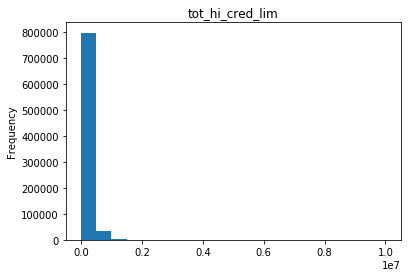

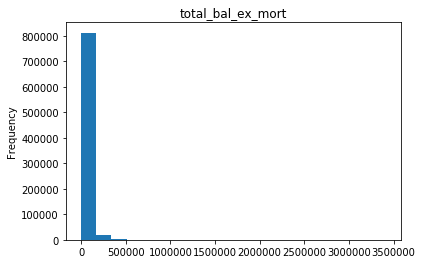

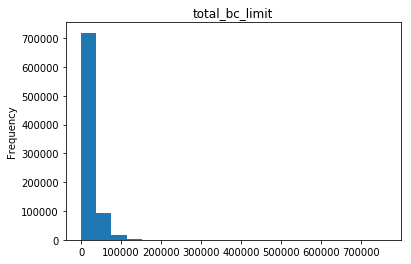

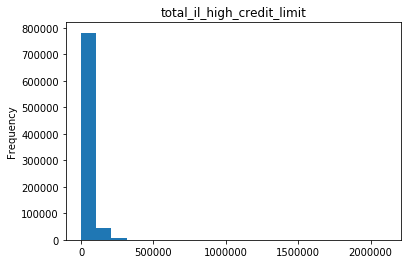

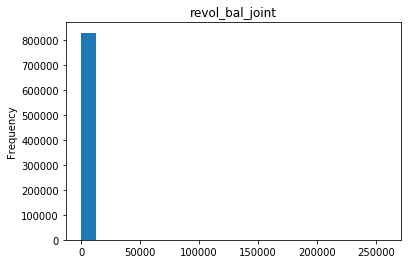

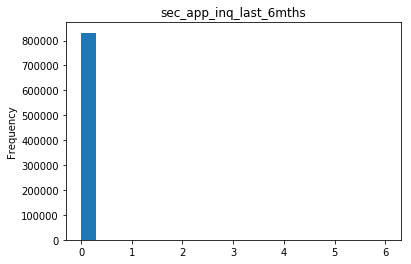

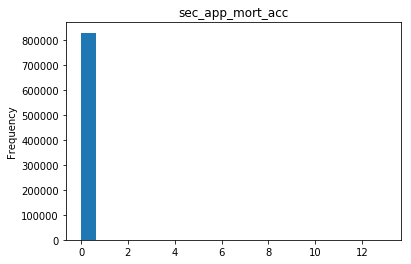

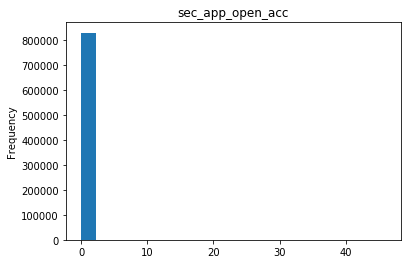

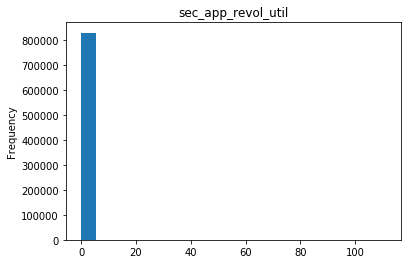

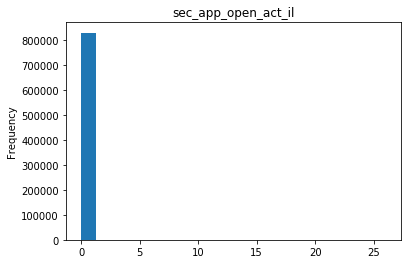

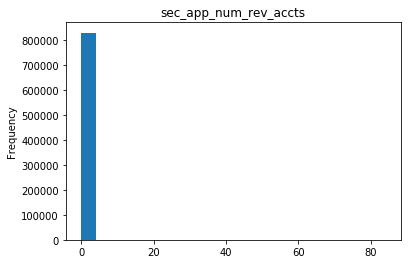

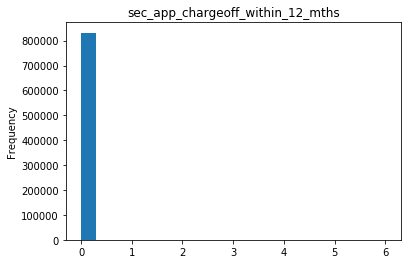

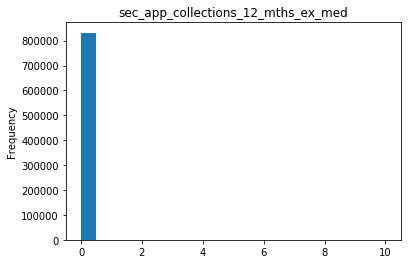

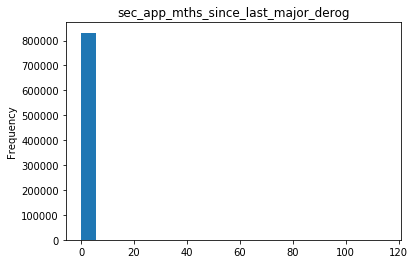

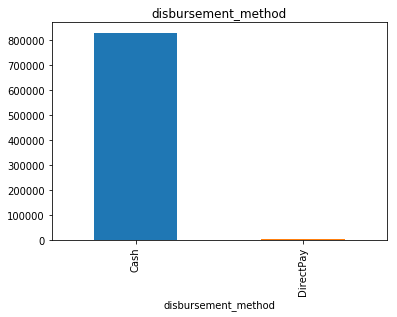

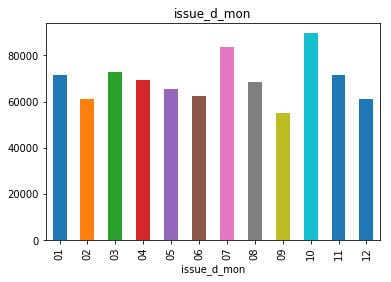

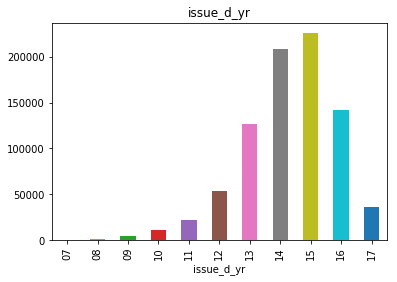

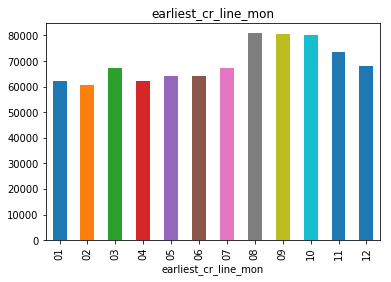

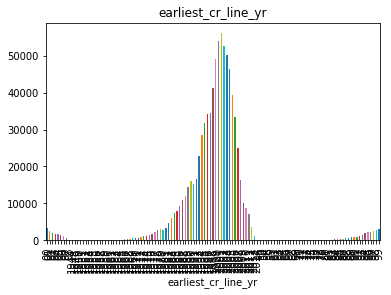

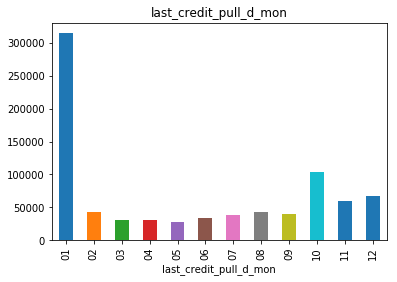

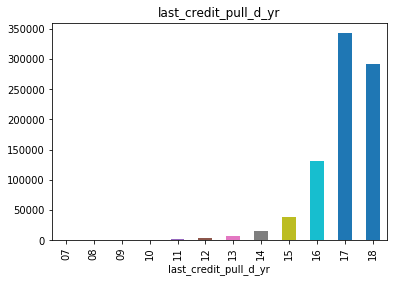

In [21]:
# There is a debate between get_dummies (from pandas) and onehotencoder and vectorizer.
# I have decided to pick get_dummies.

# The following code generates the histogram of the data.
# In case, when the data is not numeric, it does three things.
# 1. Generate a bar-chart. The equivalent of histogram.
# 2. Do one-hot encoding using get_dummies.
# 3. Drop the original column name.
for y in df.columns:
    try:
        plt.figure()
        df[y].plot.hist(bins=20, title=y)
    except:
        df.groupby(y).size().plot(kind='bar', title=y)
        # df = df.join(pd.get_dummies(df[y], prefix=y))
        # df.drop(y, axis=1, inplace=True)

In [22]:
print(df['last_credit_pull_d_mon'].unique())

['07' '08' '11' '01' '04' '12' '10' '06' '09' '05' '03' '02']


In [23]:
print(df['earliest_cr_line_yr'].unique())

['1986' '1998' '2004' '1999' '2005' '1987' '2003' '1992' '2009' '1996'
 '2012' '1993' '2007' '1995' '1997' '2011' '1994' '2002' '2000' '2008'
 '2001' '2010' '2006' '1980' '1984' '1991' '1990' '1985' '1989' '1988'
 '2013' '1978' '1983' '1976' '1967' '1979' '1971' '1982' '1973' '1981'
 '1977' '1963' '1972' '1965' '1966' '1968' '1970' '1969' '1964' '1974'
 '1975' '1956' '1959' '1961' '1960' '1962' '2014' '1958' '1957' '1953'
 '1955' '1950' '1951' '1952' '1954' '1949' '1944' '1948' '85' '99' '01'
 '96' '04' '05' '07' '98' '89' '03' '91' '93' '97' '83' '02' '84' '06'
 '87' '81' '00' '94' '95' '92' '86' '90' '88' '80' '08' '73' '79' '82'
 '78' '71' '72' '70' '69' '75' '76' '77' '62' '68' '74' '64' '67' '65'
 '63' '54' '66' '59' '56' '46' '50' '61']
